# Teoría de Optimización Clásica


## Problemas no restringidos

### Ejemplo

Consiedere la función $f(x,y)$ determine:

1. Gráfique la función $f$
2. Los puntos estacionarios de la función

$$ 
f(x,y) = x^3 + 2y^2 + 3xy^2
$$

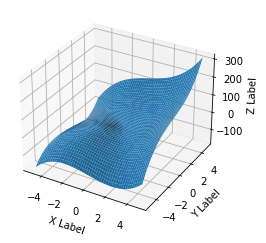

In [91]:
# Parte 1y
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creamos la figura y los ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definimos la función 
def f(x,y):
    return x**3 + y**3 + 3*x*y

# Definimos valores x, y para calcular z
x = y = np.arange(-5.0, 5.0, 0.05)
X, Y = np.meshgrid(x, y)
z = np.array(f(np.ravel(X), np.ravel(Y)))
Z = z.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [92]:
# Parte 2
from __future__ import division
from sympy import *

x, y = symbols('x y')

f = x**3 + y**3 + 3*x*y

fx = diff(f, x)
fy = diff(f, y)
print('Derivadas Parciales de 1er orden:')
print(f'fx: {fx}')
print(f'fy: {fy}')

pprint(solve([
    Eq(fx, 0),
    Eq(fy, 0)
], [x,y]))




Derivadas Parciales de 1er orden:
fx: 3*x**2 + 3*y
fy: 3*x + 3*y**2
⎡                  ⎛           2          ⎞  ⎛           2          ⎞⎤
⎢                  ⎜ ⎛1   √3⋅ⅈ⎞   1   √3⋅ⅈ⎟  ⎜ ⎛1   √3⋅ⅈ⎞   1   √3⋅ⅈ⎟⎥
⎢(-1, -1), (0, 0), ⎜-⎜─ - ────⎟ , ─ - ────⎟, ⎜-⎜─ + ────⎟ , ─ + ────⎟⎥
⎣                  ⎝ ⎝2    2  ⎠   2    2  ⎠  ⎝ ⎝2    2  ⎠   2    2  ⎠⎦


### Método de Newton-Raphson

Vamos a utilizar el método [`newton`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) de la librería scipy para encontrar el resultado del ejercicio

#### Ejemplo

$$f(x) = (3x-2)^2(2x-3)^2$$

(2*y - 3)**2*(18*y - 12) + (3*y - 2)**2*(8*y - 12)
[2/3, 13/12, 3/2]


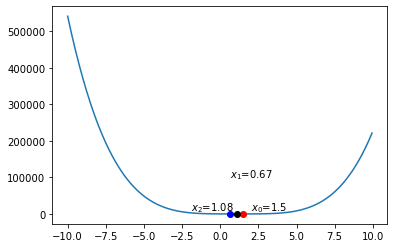

In [93]:
from scipy.optimize import newton

def f(x):
    return (3*x - 2)**2 * (2*x-3)**2

def fprime(x):
    return (2*x - 3)**2*(18*x - 12) + (3*x - 2)**2*(8*x - 12)

y = symbols('y')

print(diff((3*y - 2)**2 * (2*y-3)**2, y))
print(solve(diff((3*y - 2)**2 * (2*y-3)**2, y)))

x = np.arange(-10, 10, 0.05)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, f(x))

root = newton(f, 10)
ax.plot(root, f(root), 'or')
plt.annotate(f"$x_0$={round(root, 2)}", (root+0.5, f(root)+10000))

root = newton(f, 0.5)
plt.annotate(f"$x_1$={round(root, 2)}", (root, f(root)+100000))
ax.plot(root, f(root), 'ob')

#! Ejemplo de como "forzar" un valor
root = newton(f, 1.1, x1=13/12, maxiter=500)
plt.annotate(f"$x_2$={round(root, 2)}", (root-3, f(root)+10000))
ax.plot(root, f(root), 'ok')



## Problemas Restringidos

### Restricciones de igualdad

#### Método Jacobiano

##### Ejemplo

$$\min f(x,y,z) = x^2 + y^2 + z^2$$
S.A.
$$g_1(x,y,z) = x+y+3z-2 = 0 \\g_2(x,y,z) = 5x+2y+z -5 = 0$$

In [94]:
x, y, z = symbols('x y z')

f = x**2 + y**2 + z**2
g_1 = x + y + 3*z - 2 
g_2 = 5*x + 2*y + z - 5

f_y = Matrix([f]).jacobian(Matrix([x, y]))
f_z = Matrix([f]).jacobian(Matrix([z]))

pprint(f_y)
print('\n')
pprint(f_z)
print('\n')

J = Matrix([g_1, g_2]).jacobian(Matrix([x, y]))
C = Matrix([g_1, g_2]).jacobian(Matrix([z]))

pprint(J)
print('\n')
pprint(C)

f_c = f_z - f_y * J.inv('CH') * C
print('\n')
pprint(f_c)

result = solve([
    f_c[0,0],
    g_1,
    g_2
], [x,y,z], simplify=False, dict=True)

print('\n')
pprint(result)


[2⋅x  2⋅y]


[2⋅z]


⎡1  1⎤
⎢    ⎥
⎣5  2⎦


⎡3⎤
⎢ ⎥
⎣1⎦


⎡10⋅x   28⋅y      ⎤
⎢──── - ──── + 2⋅z⎥
⎣ 3      3        ⎦


⎡⎧   37              13⎫⎤
⎢⎨x: ──, y: 8/23, z: ──⎬⎥
⎣⎩   46              46⎭⎦


A pesar de lo interesante que es la manipulación algebraica que realizamos en las secciones anteriores, hay que considerar que las computadoras pueden utilizar los métodos númericos y entregarnos resultados de maneras más rápidas y sencillas, por eso buscaremos minimizar el problema con el método de [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) de scipy

In [95]:
from scipy.optimize import minimize

def f(params):
    x, y, z = params
    return x**2 + y**2 + z**2

def g_1(params):
    x, y, z = params
    return x + y + 3*z - 2

def g_2(params):
    x, y, z = params
    return 5*x + 2*y + z - 5

x_0 = (0,0,0)

constraints = (
    {'type': 'eq', 'fun': g_1},
    {'type': 'eq', 'fun': g_2}
)

result = minimize(f, x_0, method='SLSQP', constraints=constraints)

print(result)
# Los resultados de la celda anterior
print({
    x: round(37/46, 4),
    y: round(8/23, 4),
    z: round(13/46, 4)
})

     fun: 0.8478260869565215
     jac: array([1.60869567, 0.69565219, 0.56521741])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.80434783, 0.34782609, 0.2826087 ])
{x: 0.8043, y: 0.3478, z: 0.2826}


#### Método Lagrangiano

###### Ejemplo

$$f(\mathbf{x}) = x_1^2 + x_2^2 + x_3^2 \\ g_1(\mathbf{x}) = x_1+x_2+3x_3-2 = 0 \\g_2(\mathbf{x}) = 5x_1+2x_2+x_3 -5 = 0$$

La función Langraniana sería:

$$L(\mathbf{x}, \lambda) = x_1^2 + x_2^2 + x_3^2 \\ - \lambda_{1}(x_1+x_2+3x_3-2) \\ -\lambda_{2}(5x_1+2x_2+x_3-5)$$

In [99]:
x_1, x_2, x_3, lambda_1, lambda_2 = symbols('x_1 x_2 x_3 lambda_1 lambda_2')

L = x_1**2 + x_2**2 + x_3**2 - lambda_1*(x_1 + x_2 + 3*x_3 - 2) - lambda_2*(5*x_1 + 2*x_2 + x_3 - 5)

result = solve([
    Eq(diff(L, x_1), 0),
    Eq(diff(L, x_2), 0),
    Eq(diff(L, x_3), 0),
    Eq(diff(L, lambda_1), 0),
    Eq(diff(L, lambda_2), 0),
], [x_1, x_2, x_3, lambda1, lambda2])

pprint(result)

⎧                        37                13⎫
⎨λ₁: 2/23, λ₂: 7/23, x₁: ──, x₂: 8/23, x₃: ──⎬
⎩                        46                46⎭
